## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

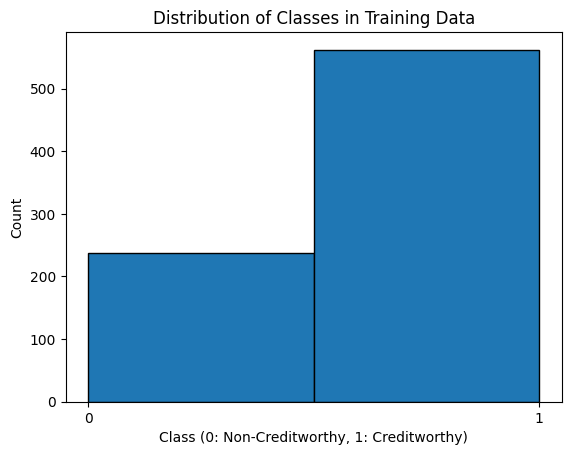

In [8]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [9]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [10]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.56
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

Создадим ансамбли из изначальных моделей, а также изменим для изначальных моделей гиперпараметры. Также выполним предобработку данных.

In [ ]:
# Создание ансамбля моделей
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Предобработка данных - масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Настройка базовых моделей (уже представленных в ноутбуке)
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    random_state=42
)

mlp_model = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    max_iter=1000,
    alpha=0.0001,
    learning_rate='adaptive',
    random_state=42
)

# 3. Создание Voting Classifier (голосующий ансамбль)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('mlp', mlp_model)
    ],
    voting='soft',  # Используем вероятности для голосования
    weights=[2, 2, 1]  # Даем больший вес RandomForest и GradientBoosting, так как они демонстрировали лучшие результаты
)

# 4. Обучение голосующего ансамбля
voting_clf.fit(X_train_scaled, y_train)

# 5. Получение прогнозов и вероятностей
voting_pred = voting_clf.predict(X_test_scaled)
voting_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

# 6. Расчет метрик для голосующего ансамбля
voting_roc_auc = roc_auc_score(y_test, voting_proba)
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_precision = precision_score(y_test, voting_pred)
voting_recall = recall_score(y_test, voting_pred)

print("Метрики для Voting Ensemble:")
print(f"ROC AUC: {voting_roc_auc:.4f}")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"Precision: {voting_precision:.4f}")
print(f"Recall: {voting_recall:.4f}")

# 7. Создание Stacking Classifier (стекинг ансамбль)
estimators = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('mlp', mlp_model)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C=1.0, class_weight='balanced', max_iter=1000),
    cv=5,
    stack_method='predict_proba'
)

# 8. Обучение стекинг ансамбля
stacking_clf.fit(X_train_scaled, y_train)

# 9. Получение прогнозов и вероятностей для стекинга
stacking_pred = stacking_clf.predict(X_test_scaled)
stacking_proba = stacking_clf.predict_proba(X_test_scaled)[:, 1]

# 10. Расчет метрик для стекинг ансамбля
stacking_roc_auc = roc_auc_score(y_test, stacking_proba)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
stacking_precision = precision_score(y_test, stacking_pred)
stacking_recall = recall_score(y_test, stacking_pred)

print("\nМетрики для Stacking Ensemble:")
print(f"ROC AUC: {stacking_roc_auc:.4f}")
print(f"Accuracy: {stacking_accuracy:.4f}")
print(f"Precision: {stacking_precision:.4f}")
print(f"Recall: {stacking_recall:.4f}")

# 11. Сравнение с индивидуальными моделями
# Обучение базовых моделей на масштабированных данных
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
mlp_model.fit(X_train_scaled, y_train)



print("\nСравнение ROC AUC всех моделей:")
print(f"RandomForest: {rf_roc_auc:.4f}")
print(f"GradientBoosting: {gb_roc_auc:.4f}")
print(f"MLP: {mlp_roc_auc:.4f}")
print(f"Voting Ensemble: {voting_roc_auc:.4f}")
print(f"Stacking Ensemble: {stacking_roc_auc:.4f}")



Метрики для Voting Ensemble:
ROC AUC: 0.7952
Accuracy: 0.7650
Precision: 0.7935
Recall: 0.8913

Метрики для Stacking Ensemble:
ROC AUC: 0.7838
Accuracy: 0.7300
Precision: 0.8387
Recall: 0.7536

Сравнение ROC AUC всех моделей:
RandomForest: 0.6751
GradientBoosting: 0.6703
MLP: 0.5562
Voting Ensemble: 0.7952
Stacking Ensemble: 0.7838


Таким образом, лучший результат, которого удалось достичь у Voting Ensemble: AUC = 0.7952